In [1]:
import numpy as np
import random
from IPython.display import clear_output
from collections import deque
import progressbar


In [2]:
!pip install gym[toy_text]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


In [3]:
import gym
env = gym.make('Taxi-v3')
env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


408

In [4]:
import matplotlib
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


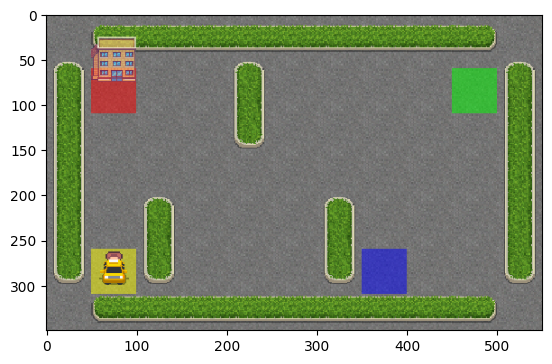

In [5]:
plt.imshow(env.render(mode='rgb_array'))

In [6]:
env.P[5]

{0: [(1.0, 105, -1, False)],
 1: [(1.0, 5, -1, False)],
 2: [(1.0, 25, -1, False)],
 3: [(1.0, 5, -1, False)],
 4: [(1.0, 5, -10, False)],
 5: [(1.0, 5, -10, False)]}

In [7]:
env.observation_space.n

500

In [8]:
env.action_space.n

6

In [9]:
env.step(0)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(408,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 1, 0], dtype=int8)})

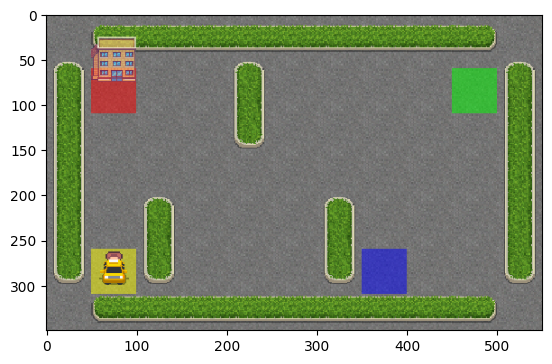

In [10]:
plt.imshow(env.render(mode='rgb_array'))

In [11]:
env.step(0)

(408,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 1, 0], dtype=int8)})

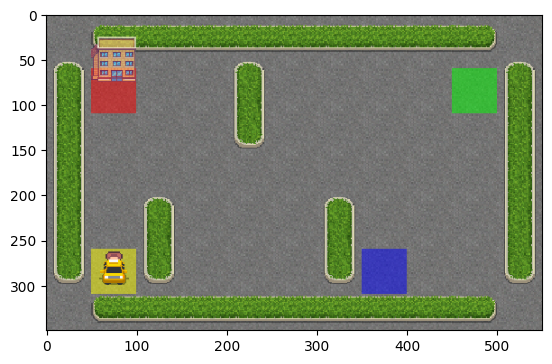

In [12]:
plt.imshow(env.render(mode='rgb_array'))

In [13]:
env.step(3); env.step(3);env.step(1); env.step(1)

(208,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

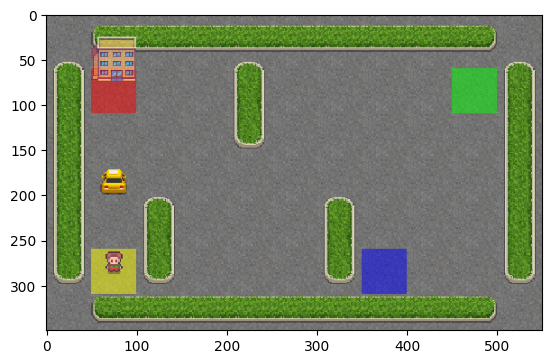

In [14]:
plt.imshow(env.render(mode='rgb_array'))

In [15]:
env.step(3); env.step(3);env.step(1); env.step(1)

(8,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 0, 1, 0, 0, 0], dtype=int8)})

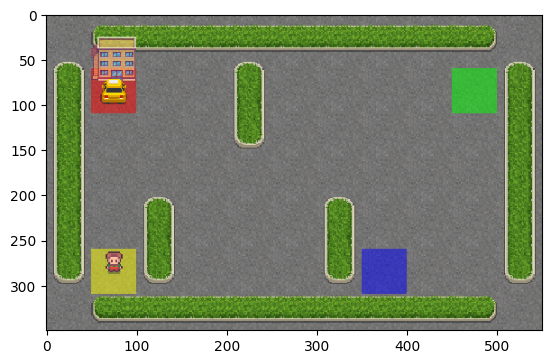

In [16]:
plt.imshow(env.render(mode='rgb_array'))

In [17]:
env.step(4)

(8,
 -10,
 False,
 {'prob': 1.0, 'action_mask': array([1, 0, 1, 0, 0, 0], dtype=int8)})

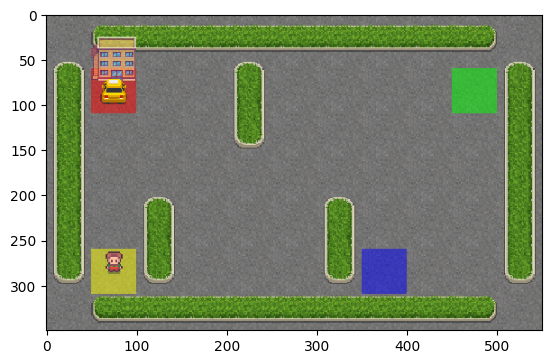

In [18]:
plt.imshow(env.render(mode='rgb_array'))

In [19]:
env.step(0);env.step(0);

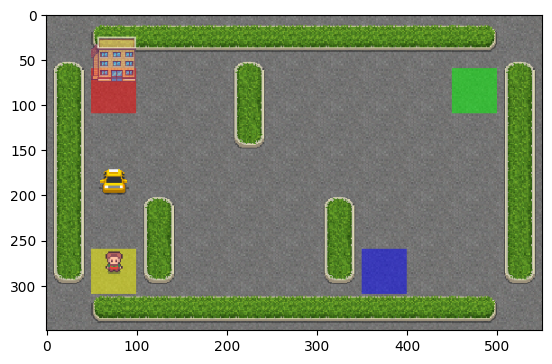

In [20]:
plt.imshow(env.render(mode='rgb_array'))

In [21]:
env.step(0);env.step(0);

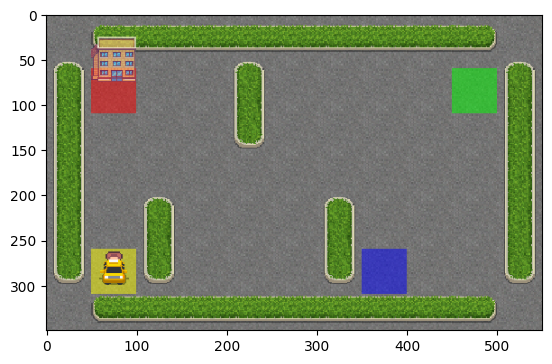

In [22]:
plt.imshow(env.render(mode='rgb_array'))

In [23]:
env.step(1)

(308,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

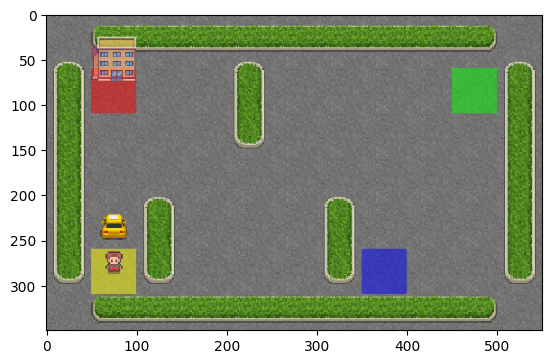

In [24]:
plt.imshow(env.render(mode='rgb_array'))

In [25]:
env.step(5)

(308,
 -10,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

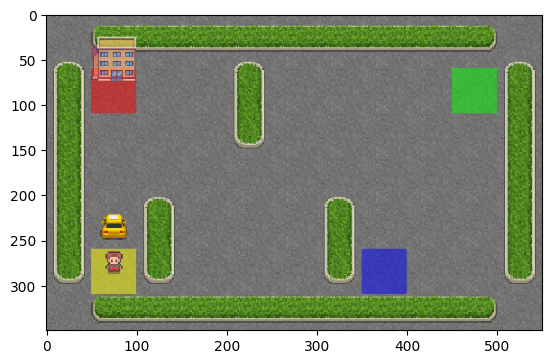

In [26]:
plt.imshow(env.render(mode='rgb_array'))

In [27]:
env.step(1); env.step(1)

(108,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

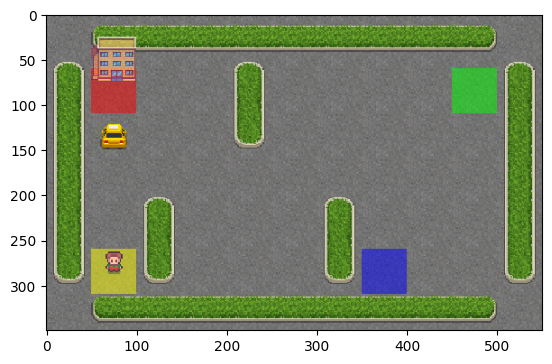

In [28]:
plt.imshow(env.render(mode='rgb_array'))

In [29]:
env.step(0);env.step(0)

(308,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

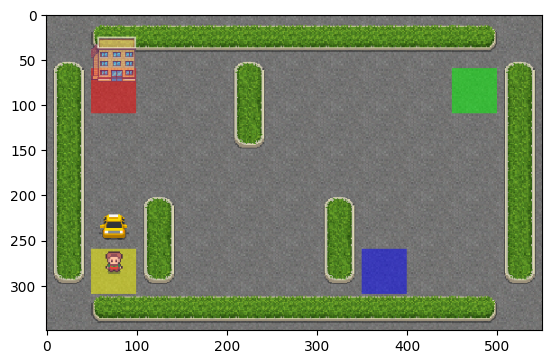

In [30]:
plt.imshow(env.render(mode='rgb_array'))

In [31]:
env.step(0)

(408,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 1, 0], dtype=int8)})

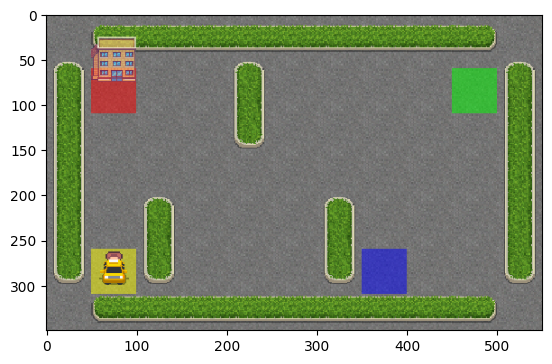

In [32]:
plt.imshow(env.render(mode='rgb_array'))

In [33]:
env.step(5)

(408,
 -10,
 False,
 {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 1, 0], dtype=int8)})

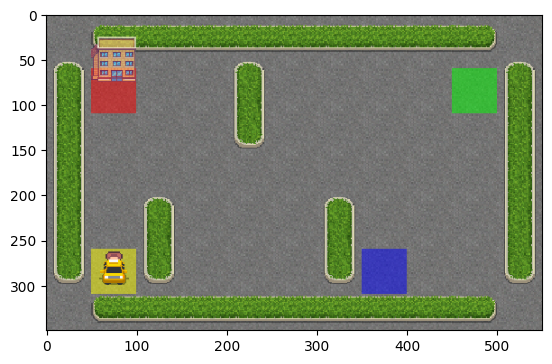

In [34]:
plt.imshow(env.render(mode='rgb_array'))

In [35]:
env.step(1)

(308,
 -1,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

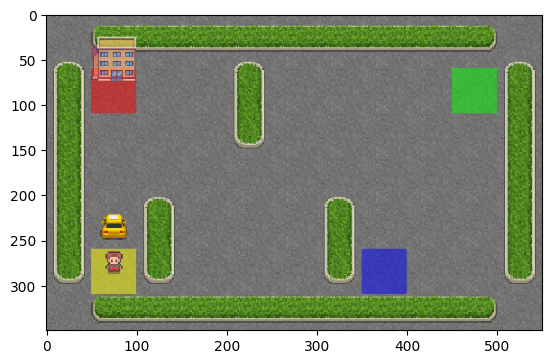

In [36]:
plt.imshow(env.render(mode='rgb_array'))

In [37]:
epochs = 0
penalties, reward = 0, 0
env.reset()

frames = [] # for rendering
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    frames.append({
        'frame':env.render(mode='ansi'),
        'state':state,
        'action':action,
        'reward':reward,
    })
    epochs += 1


In [38]:
print('Timesteps taken: {}'.format(epochs))
print('Penalties incurred: {}'.format(penalties))


Timesteps taken: 200
Penalties incurred: 70


In [39]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print_a_frame(frame, i)
        sleep(.5)

def print_a_frame(frame, idx=None):
    clear_output(wait=True)
    print(frame['frame'])
    if idx:
        print('Timestep: {}'.format(idx+1))
    print('State: {}'.format(frame['state']))
    print('Action: {}'.format(frame['action']))
    print('Reward: {}'.format(frame['reward']))

In [40]:
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 200
State: 404
Action: 4
Reward: -10


In [41]:
import numpy as np
class QLearning():
    def __init__(self, gym_env, epsilon, gamma, alpha):
        self.gym_env = gym_env
        self._q_table = np.zeros([self.gym_env.observation_space.n, self.gym_env.action_space.n])
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha

    def take_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            action = self.gym_env.action_space.sample() # Explore action space
        else:
            action = np.argmax(self._q_table[state]) # Exploit learned values
        return action

    def infer_action(self, state):
        action = np.argmax(self._q_table[state])
        return action

    def update_q_table(self, state, action, next_state, reward):
        old_value = self._q_table[state, action]
        next_action = self.take_action(next_state)
        next_state_q_value = self._q_table[next_state, next_action]

        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_state_q_value)
        self._q_table[state, action] = new_value

#    def update_q_table(self, state, action, next_state, reward):
#        old_value = self._q_table[state, action]
#        next_state_max_q_value = np.max(self._q_table[next_state])
#
#        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_state_max_q_value)
#        self._q_table[state, action] = new_value

In [42]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
num_of_episodes = 100001

In [43]:
q_learn = QLearning(env, epsilon, gamma, alpha)


In [44]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, num_of_episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        #get action with epsilon
        action = q_learn.take_action(state)
        next_state, reward, done, info = env.step(action)
        q_learn.update_q_table(state, action, next_state, reward)
        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print('Episode: {}'.format(i))

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 4min 43s, sys: 19.1 s, total: 5min 2s
Wall time: 4min 54s


In [45]:
q_learn._q_table[328]


array([ -3.83218579,  -2.73969584,  -3.72676199,  -3.94133815,
       -11.79423125, -12.10193128])

In [46]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
num_of_episodes = 100
frames = []

for _ in range(num_of_episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        #import pdb; pdb.set_trace()
        action = q_learn.infer_action(state)
        state, reward, done, info = env.step(action)
        frames.append({
            'frame':env.render(mode='ansi'),
            'state':state,
            'action':action,
            'reward':reward,
        })

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print('Results after {} num_of_episodes:'.format(num_of_episodes))
print('\tAverage timesteps per episode: {}'.format(total_epochs / num_of_episodes))
print('\tAverage penalties per episode: {}'.format(total_penalties / num_of_episodes))


Results after 100 num_of_episodes:
	Average timesteps per episode: 99.1
	Average penalties per episode: 0.0


In [47]:
len(frames)


9910

In [48]:
print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Timestep: 918
State: 86
Action: 1
Reward: -1


KeyboardInterrupt: 